In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


<h1 style="font-family: 'Poppins', sans-serif; font-size:36px; text-align: center; color: #282B28">Diabetes EDA and Predictions</h1>

<div style="display: flex; flex-direction: column; justify-content: center; align-items: center;">
    <img style="height: 200px; width: auto;" src="https://www.idf.org/images/site1/content/Blue-circle.jpg"/>
</div>

<a href=#section1 style="font-family: 'Poppins', sans-serif; font-size:16px;">1. Introduction</a><br>
<a href="#section2" style="font-family: 'Poppins', sans-serif; font-size:16px;">2. Exploratory Data Analysis</a><br>
<a href="#section3" style="font-family: 'Poppins', sans-serif; font-size:16px;">3. Data Preprocessing</a><br>
<a href="#section4" style="font-family: 'Poppins', sans-serif; font-size:16px;">4. Classification Models</a><br>
<a href="#section5" style="font-family: 'Poppins', sans-serif; font-size:16px;">5. Results</a><br>

<a id="section1"></a>
<h1 style="font-family: 'Poppins', sans-serif; font-size: 24px; text-align: left; color: #176087">Introduction</h1>

<p style="font-family: 'Poppins', sans-serif; font-size:18px;">Diabetes mellitus, commonly known as diabetes is a metabolic disease that causes high blood sugar. The hormone insulin moves sugar from the blood into your cells to be stored or used for energy. With diabetes, your body either doesn’t make enough insulin or can’t effectively use the insulin it does make.<br><br>Untreated high blood sugar from diabetes can damage your nerves, eyes, kidneys, and other organs.<br><br>Blood Sugar level less than 140mg/dL is normal.<br>A reading of more than 200mg/dL after two hours indicates diabetes.<br>A reading between 140 and 199mg/dL indicates prediabetes.
</p>

<a id="section2"></a>
<h1 style="font-family: 'Poppins', sans-serif; font-size: 28px; text-align: left; color: #176087; background-color: #FDF0D5; padding: 25px; border-radius: 10px;">1. Exploratory Data Analysis</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

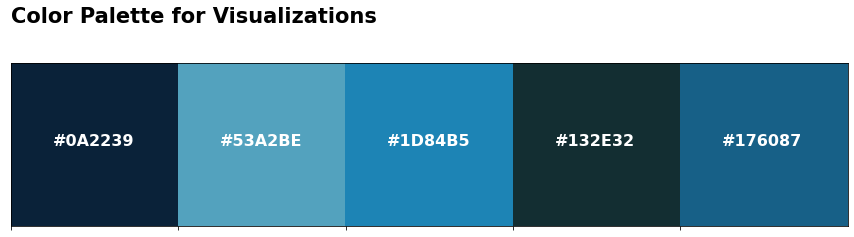

In [8]:
colors= ['#0A2239' ,'#53A2BE' ,'#1D84B5' ,'#132E32' ,'#176087']
sns.palplot(colors, size=3)
plt.text(-0.5, -0.75, "Color Palette for Visualizations", {'fontfamily': 'sans-serif', 'size': 21, 'weight':'semibold'})
for idx,values in enumerate(colors):
    plt.text(idx-0.25,0, colors[idx],{'fontfamily':'Poppins, sans-serif', 'size':16, 'weight':'semibold','color':'#fff'}, alpha =1)

<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">Univariate Analysis</h1>

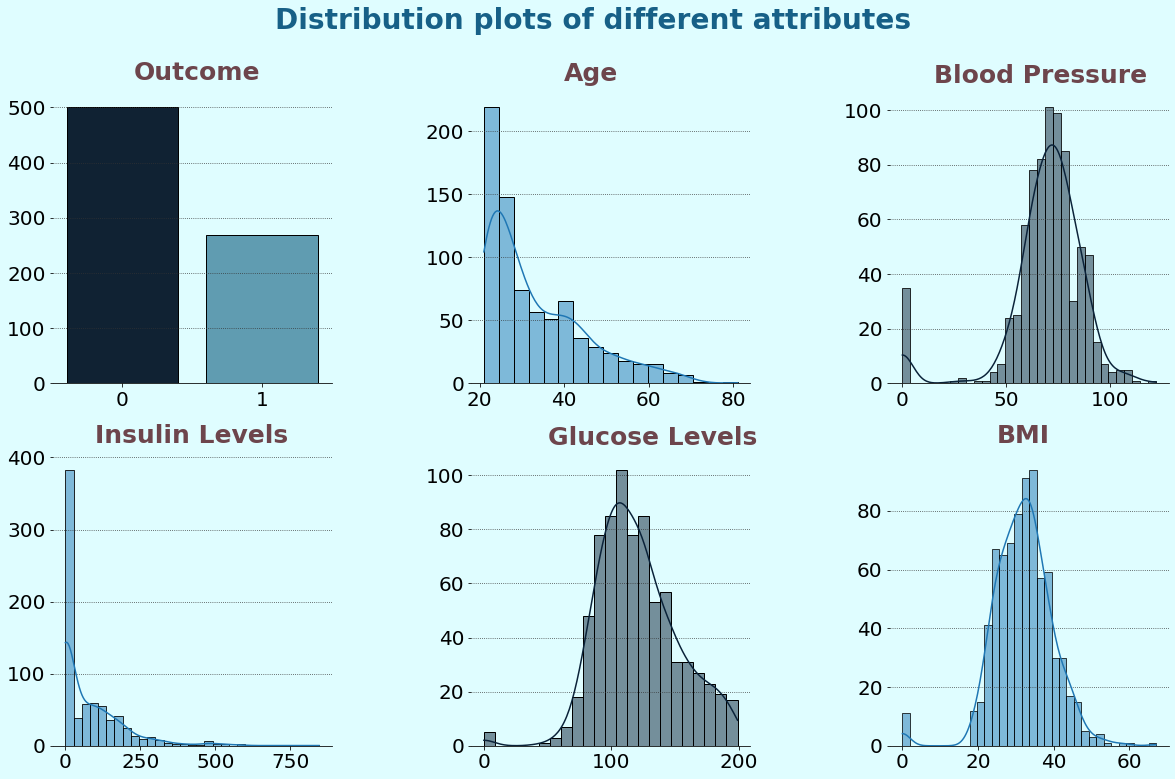

In [9]:
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#DFFDFF"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color)


ax0.text(0.08, 550, 'Outcome', fontsize=25, color='#6D454C', weight='bold')
ax0.grid(axis='y', color="#333", linestyle=':')
ax0.tick_params(axis='both', which='major', labelsize=20)
sns.countplot(x='Outcome', data=df, palette=colors, ax=ax0, edgecolor="black").set(xlabel="", ylabel="")

ax1.text(40, 240, 'Age', fontsize=25, color='#6D454C', weight='bold')
ax1.grid(axis='y', color="#333", linestyle=':')
ax1.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='Age', data=df, palette=colors, ax=ax1, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax2.text(15, 110, 'Blood Pressure', fontsize=25, color='#6D454C', weight='bold')
ax2.grid(axis='y', color="#333", linestyle=':')
ax2.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='BloodPressure', data=df, color='#0A2239', ax=ax2, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax3.text(100, 420, 'Insulin Levels', fontsize=25, color='#6D454C', weight='bold')
ax3.grid(axis='y', color="#333", linestyle=':')
ax3.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='Insulin', data=df, palette=colors, ax=ax3, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax4.text(50, 111, 'Glucose Levels', fontsize=25, color='#6D454C', weight='bold')
ax4.grid(axis='y', color="#333", linestyle=':')
ax4.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='Glucose', data=df, color='#0A2239', ax=ax4, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax5.text(25, 103 , 'BMI', fontsize=25, color='#6D454C', weight='bold')
ax5.grid(axis='y', color="#333", linestyle=':')
ax5.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='BMI', data=df, ax=ax5, edgecolor="black", kde=True).set(xlabel="", ylabel="")

fig.suptitle('Distribution plots of different attributes', fontsize="28", weight="bold", color="#176087")


for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<h4 style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 700;">Interpretations from the above graphs.</h4>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Age and Insulin columns are highly right skewed. I'll have to normalize it before using it for the model building,</li>
    <li>Dataset contains more number of people between the age of 20-40 years.</li>
    <li>Large number of people have blood pressure between 50 and 100 mmHg</li>
    <li>Large number of people with insulin values of 0. Mostly insulin levels of 0 are seen in Type 1 diabetic patients.</li>
    <li>Lot of people have glucose levels between 100 and 200 mg/dL. People with Glucose levels between 140mg/dL and 199mg/dL are considered to be prediabetic. </li>
    <li>There are a lot of people in the BMI range of 20 and 50. A healthy adult should have a BMI between 18.5 and 24.9. This dataset obviously has many people who are either overweight or obese.</li>
</ul>

<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">Multivariate Analysis</h1>

<AxesSubplot:>

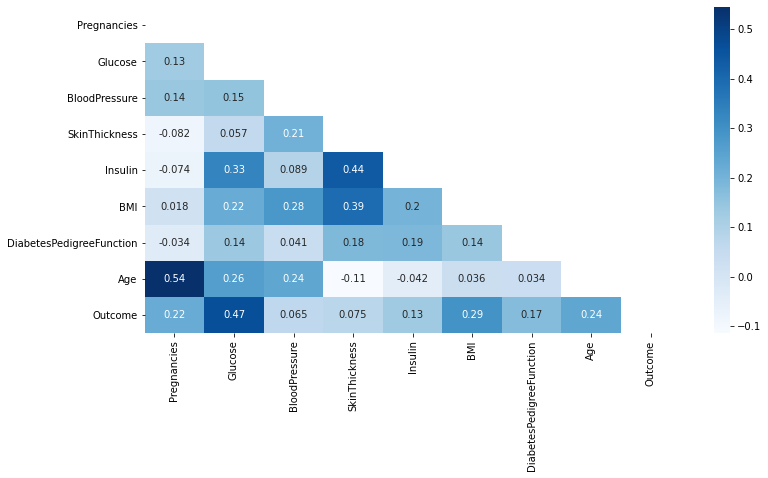

In [10]:
plt.figure(figsize=(12,6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues', mask=matrix)

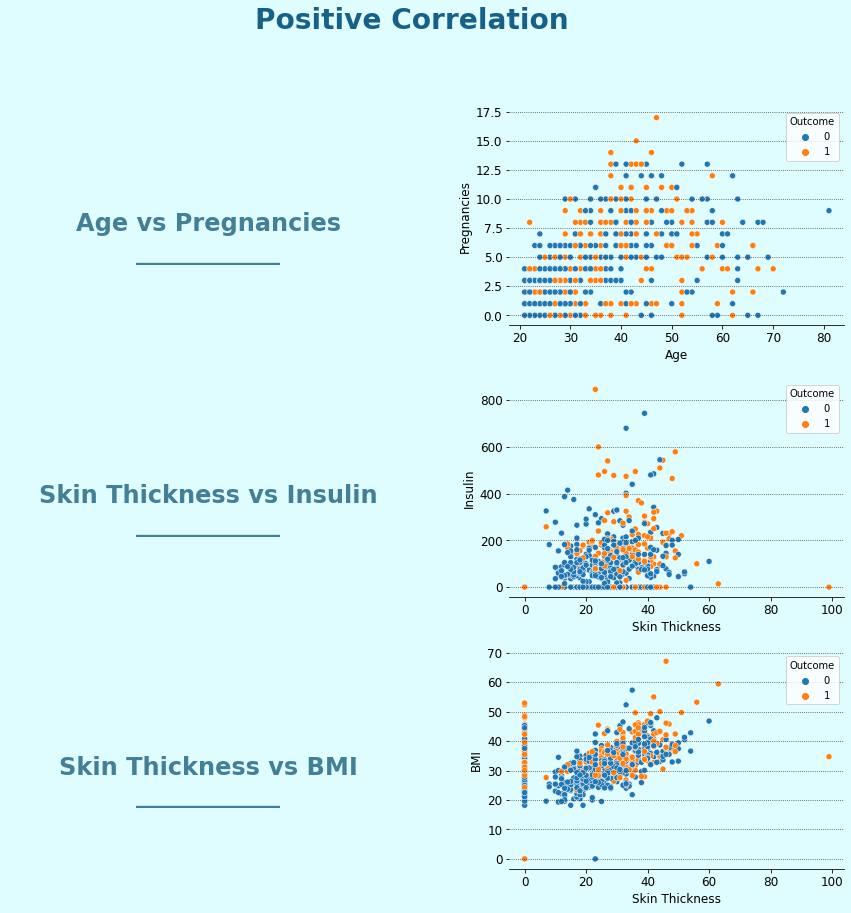

In [11]:
fig = plt.figure(figsize=(15,14))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])
axB = fig.add_subplot(gs[0,1])
axC = fig.add_subplot(gs[1,0])
axD = fig.add_subplot(gs[1,1])
axE = fig.add_subplot(gs[2,0])
axF = fig.add_subplot(gs[2,1])

background_color = "#DFFDFF"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color) 
axC.set_facecolor(background_color) 
axD.set_facecolor(background_color) 
axE.set_facecolor(background_color) 
axF.set_facecolor(background_color)

axA.tick_params(axis='both',left=False, bottom=False)
axA.set_xticklabels([])
axA.set_yticklabels([])
axA.text(0.6,0.4, "Age vs Pregnancies\n____________",horizontalalignment = 'center',verticalalignment = 'center',
         fontsize = 24,fontweight='bold',fontfamily='sans-serif', color='#437F97')

axC.tick_params(axis='both',left=False, bottom=False)
axC.set_xticklabels([])
axC.set_yticklabels([])
axC.text(0.6,0.4, "Skin Thickness vs Insulin\n____________",horizontalalignment = 'center',verticalalignment = 'center',
         fontsize = 24,fontweight='bold',fontfamily='sans-serif', color='#437F97')

axE.tick_params(axis='both',left=False, bottom=False)
axE.set_xticklabels([])
axE.set_yticklabels([])
axE.text(0.6,0.4, "Skin Thickness vs BMI\n____________",horizontalalignment = 'center',verticalalignment = 'center',
         fontsize = 24,fontweight='bold',fontfamily='sans-serif', color='#437F97')

axB.grid(axis='y', color="#333", linestyle=':')
axB.tick_params(axis='both', which='major', labelsize=12)
axB.set_xlabel('Age',fontsize=12)
axB.set_ylabel('Pregnancies',fontsize=12)
sns.scatterplot(x="Age",y="Pregnancies",data=df, ax=axB, hue="Outcome")

axD.grid(axis='y', color="#333", linestyle=':')
axD.tick_params(axis='both', which='major', labelsize=12)
axD.set_xlabel('Skin Thickness',fontsize=12)
axD.set_ylabel('Insulin',fontsize=12)
sns.scatterplot(x="SkinThickness",y="Insulin",data=df, ax=axD, hue="Outcome")

axF.grid(axis='y', color="#333", linestyle=':')
axF.tick_params(axis='both', which='major', labelsize=12)
axF.set_xlabel('Skin Thickness',fontsize=12)
axF.set_ylabel('BMI',fontsize=12)
sns.scatterplot(x="SkinThickness",y="BMI",data=df, ax=axF, hue="Outcome")

fig.suptitle('Positive Correlation', fontsize="28", 
             weight="bold", color="#176087")

for s in ["top","right","left", "bottom"]:
    axA.spines[s].set_visible(False)
    axC.spines[s].set_visible(False)
    axE.spines[s].set_visible(False)
    
for s in ["top","right","left"]:
    axB.spines[s].set_visible(False)
    axD.spines[s].set_visible(False)
    axF.spines[s].set_visible(False)

<h4 style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 700;">Interpretations from the above graphs.</h4>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Age vs Pregnancies shows minorly that with low number of pregnancy and lesser age the person tends to not have diabetes. But with increase in age and number of pregnancies chances of getting diabetes increases. </li>
    <li>Skin Thickness vs Insulin shows the larger skin thickness and higher insulin values contributes to Diabetes.</li>
    <li> <b>Now some people may think that if there is high level of Insulin then why isn't Diabetes balanced?</b> It happens when the body doesn't respond properly to the Insulin produced. So this leads to Diabetes and also increased Insulin Levels. </li>
    <li>Skin Thickness vs BMI shows higher BMI and larger skin thickness contributes to Diabetes. BMI greater than 25 is already defined as overweight and there are many people in this dataset with BMI greater than 30.</li>
</ul>

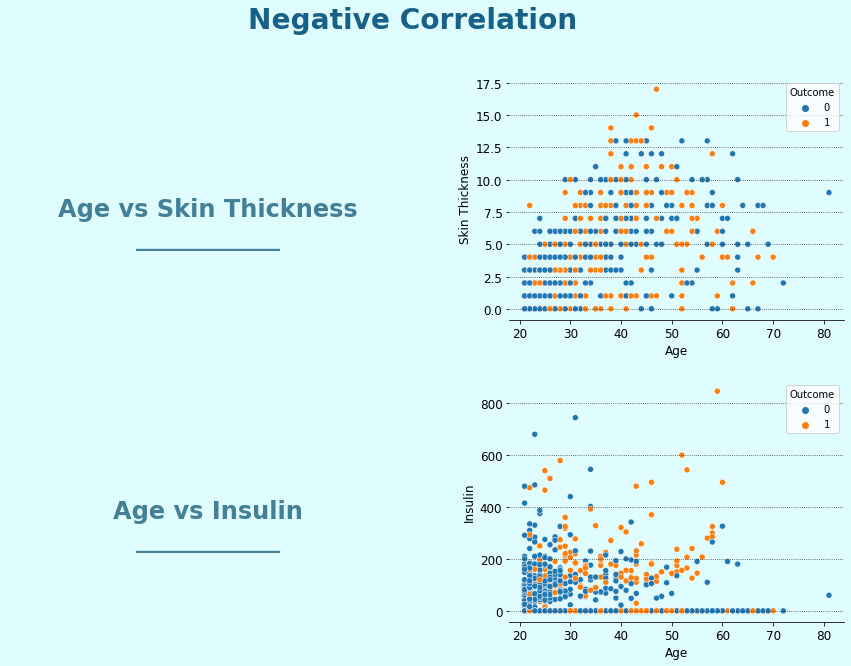

In [12]:
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.25)
axA = fig.add_subplot(gs[0,0])
axB = fig.add_subplot(gs[0,1])
axC = fig.add_subplot(gs[1,0])
axD = fig.add_subplot(gs[1,1])

background_color = "#DFFDFF"
fig.patch.set_facecolor(background_color)
axA.set_facecolor(background_color) 
axB.set_facecolor(background_color) 
axC.set_facecolor(background_color) 
axD.set_facecolor(background_color) 

axA.tick_params(axis='both',left=False, bottom=False)
axA.set_xticklabels([])
axA.set_yticklabels([])
axA.text(0.6,0.4, "Age vs Skin Thickness\n____________",horizontalalignment = 'center',verticalalignment = 'center',
         fontsize = 24,fontweight='bold',fontfamily='sans-serif', color='#437F97')

axC.tick_params(axis='both',left=False, bottom=False)
axC.set_xticklabels([])
axC.set_yticklabels([])
axC.text(0.6,0.4, "Age vs Insulin\n____________",horizontalalignment = 'center',verticalalignment = 'center',
         fontsize = 24,fontweight='bold',fontfamily='sans-serif', color='#437F97')

axB.grid(axis='y', color="#333", linestyle=':')
axB.tick_params(axis='both', which='major', labelsize=12)
axB.set_xlabel('Age',fontsize=12)
axB.set_ylabel('Skin Thickness',fontsize=12)
sns.scatterplot(x="Age",y="Pregnancies",data=df, ax=axB, hue="Outcome")

axD.grid(axis='y', color="#333", linestyle=':')
axD.tick_params(axis='both', which='major', labelsize=12)
axD.set_xlabel('Age',fontsize=12)
axD.set_ylabel('Insulin',fontsize=12)
sns.scatterplot(x="Age",y="Insulin",data=df, ax=axD, hue="Outcome")

fig.suptitle('Negative Correlation', fontsize="28", 
             weight="bold", color="#176087")

for s in ["top","right","left", "bottom"]:
    axA.spines[s].set_visible(False)
    axC.spines[s].set_visible(False)
    
for s in ["top","right","left"]:
    axB.spines[s].set_visible(False)
    axD.spines[s].set_visible(False)

<h4 style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 700;">Interpretations from the above graphs.</h4>
<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;">
    <li>Age vs Skin Thickness shows minorly that with lesser skin thickness and lesser age the person tends to not have diabetes. But with increase in age and increase in skin thickness chances of getting diabetes increases. </li>
    <li>Age vs Insulin shows the higher insulin levels and more aged people tend to have Diabetes.</li>
</ul>

<a id="section3"></a>
<h1 style="font-family: 'Poppins', sans-serif; font-size: 28px; text-align: left; color: #176087; background-color: #FDF0D5; padding: 25px; border-radius: 10px;">2. Data Preprocessing</h1>

<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">Missing Values</h1>

<ul style="font-family: 'Poppins', sans-serif; font-size: 16px;"><li>After some digging I found that the zeroes in the columns like Insulin levels, BMI, Glucose etc. are just missing values.</li> <li>Also it was kind of obvious that glucose and other such important attributes of Human Body can never be zero.</li><li>So first I'll replace all the zeroes in such columns to NaN values and then impute accordingly with median.</li></ul>

In [13]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [14]:
def median_target(data, var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [15]:
def replace_median(data, columns):
    for i in columns:
        f = median_target(data, i)
        display(f)
        data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = f[[i]].values[0][0]
        data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = f[[i]].values[1][0]

In [16]:
null_cols = ['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI']

In [17]:
replace_median(df, null_cols)

,Outcome,Glucose
0,0,107.0
1,1,140.0


,Outcome,BloodPressure
0,0,70.0
1,1,74.5


,Outcome,SkinThickness
0,0,27.0
1,1,32.0


,Outcome,Insulin
0,0,102.5
1,1,169.5


,Outcome,BMI
0,0,30.1
1,1,34.3


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">Binning of Columns</h1>

In [20]:
df['Age'] = pd.qcut(df['Age'], 10, duplicates='drop')

In [21]:
df['BMI'] = pd.qcut(df['BMI'], 5, duplicates='drop')

<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">Preparing data for Models</h1>

In [22]:
df = pd.get_dummies(df)

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,"BMI_(18.198999999999998, 26.2]","BMI_(26.2, 30.1]","BMI_(30.1, 33.72]",...,"Age_(20.999, 22.0]","Age_(22.0, 23.0]","Age_(23.0, 25.0]","Age_(25.0, 27.0]","Age_(27.0, 29.0]","Age_(29.0, 33.0]","Age_(33.0, 38.0]","Age_(38.0, 42.6]","Age_(42.6, 51.0]","Age_(51.0, 81.0]"
0,6,148.0,72.0,35.0,169.5,0.627,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,85.0,66.0,29.0,102.5,0.351,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,8,183.0,64.0,32.0,169.5,0.672,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,0.167,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,137.0,40.0,35.0,168.0,2.288,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
# Dividing data into Train and Test
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
X_train,y_train = os.fit_resample(X_train, y_train.ravel())

<p style="font-family: 'Poppins', sans-serif; font-size: 16px;">I observed that there is more data that has Outcome 0. This may lead our models predicting more of people not having Diabetes. So I use SMOTE.
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.</p>

<a id="section4"></a>
<h1 style="font-family: 'Poppins', sans-serif; font-size: 28px; text-align: left; color: #176087; background-color: #FDF0D5; padding: 25px; border-radius: 10px;">3. Classification Models</h1>

<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">Logistic Regression</h1>

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train, y_train)
prediction1 = logmodel.predict(X_test)

In [29]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction1))

Confusion Matrix:
 [[116  35]
 [ 18  62]]


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81       151
           1       0.64      0.78      0.70        80

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.79      0.77      0.77       231



<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">K Nearest Neighbors</h1>

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [32]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[113  38]
 [ 27  53]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       151
           1       0.58      0.66      0.62        80

    accuracy                           0.72       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.72      0.72       231



In [33]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

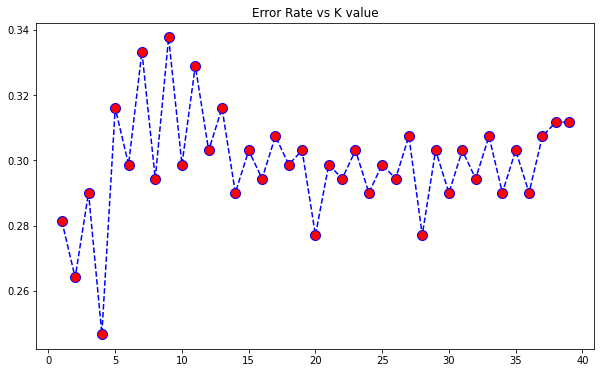

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')

In [35]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [36]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[116  35]
 [ 22  58]]


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       151
           1       0.62      0.72      0.67        80

    accuracy                           0.75       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.75      0.76       231



<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">Random Forest</h1>

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
prediction3 = rfc.predict(X_test)

In [39]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction3))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction3))

Confusion Matrix:
 [[128  23]
 [ 11  69]]


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       151
           1       0.75      0.86      0.80        80

    accuracy                           0.85       231
   macro avg       0.84      0.86      0.84       231
weighted avg       0.86      0.85      0.85       231



<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; ">Hyperparameter Tuning for Random Forest</h1>

In [40]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=10)] 
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [41]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose=3, cv=10, n_jobs = 4)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=3)

In [45]:
grid_predictions = grid_search.predict(X_test)

In [46]:
print("Confusion Matrix: \n", confusion_matrix(y_test, grid_predictions))
print("\n")
print(classification_report(y_test, grid_predictions))

Confusion Matrix: 
 [[124  27]
 [  9  71]]


              precision    recall  f1-score   support

           0       0.93      0.82      0.87       151
           1       0.72      0.89      0.80        80

    accuracy                           0.84       231
   macro avg       0.83      0.85      0.84       231
weighted avg       0.86      0.84      0.85       231



Did not have much benefit from tuning the random forest.

<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">Support Vector Machines</h1>

In [47]:
from sklearn.svm import SVC

In [48]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
predictions4 = svc_model.predict(X_test)

In [49]:
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions4))
print('\n')
print('Classification Report:\n', classification_report(y_test, predictions4))

Confusion Matrix:
 [[114  37]
 [ 19  61]]


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       151
           1       0.62      0.76      0.69        80

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.78      0.76      0.76       231



<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; ">Hyperparameter Tuning for SVM</h1>

In [50]:
param_grid_svm = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
from sklearn.model_selection import RandomizedSearchCV
rndm_cv = RandomizedSearchCV(estimator=svc_model, param_distributions=param_grid_svm, cv=10, verbose=2)
rndm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ..................................C=1

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   verbose=2)

In [51]:
rndm_preds = rndm_cv.predict(X_test)

In [52]:
print('Confusion Matrix:\n', confusion_matrix(y_test, rndm_preds))
print('\n')
print('Classification Report:\n', classification_report(y_test, rndm_preds))

Confusion Matrix:
 [[119  32]
 [ 20  60]]


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       151
           1       0.65      0.75      0.70        80

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.79      0.77      0.78       231



<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">XG Boost</h1>

In [53]:
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

[19:21:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
xgb_preds = xgb.predict(X_test)

In [56]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb_preds)}")

Confusion Matrix :- 
[[138  13]
 [ 14  66]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.84      0.82      0.83        80

    accuracy                           0.88       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.88      0.88      0.88       231



<h1 style="font-family: 'Poppins', sans-serif; font-size: 20px; text-align: left; color: #oa2239; background-color: #C0FDFB; padding: 15px; border-radius: 40px">Voting Classifier</h1>

In [57]:
from sklearn.ensemble import VotingClassifier

classifiers = [('XGboost', xgb), ('Random Forest', rfc), 
               ('Logistic', logmodel), ('KNN', knn), ('SVM', svc_model)]

In [58]:
vc = VotingClassifier(estimators = classifiers)

In [59]:
vc.fit(X_train, y_train)

[19:21:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('XGboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=5, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=180, n_jobs=4,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
                  

In [60]:
vc_preds = vc.predict(X_test)

In [61]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, vc_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, vc_preds)}")

Confusion Matrix :- 
[[124  27]
 [ 15  65]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.89      0.82      0.86       151
           1       0.71      0.81      0.76        80

    accuracy                           0.82       231
   macro avg       0.80      0.82      0.81       231
weighted avg       0.83      0.82      0.82       231



<a id="section5"></a>
<h1 style="font-family: 'Poppins', sans-serif; font-size: 28px; text-align: left; color: #176087; background-color: #FDF0D5; padding: 25px; border-radius: 10px;">4. Results</h1>

In [62]:
print('The accuracy score of Logistic Regression Model is: ', accuracy_score(y_test, prediction1)*100,'%')
print('The accuracy score of K Nearest Neighbors Model is: ', accuracy_score(y_test, prediction2)*100,'%')
print('The accuracy score of Random Forests Model is: ', accuracy_score(y_test, prediction3)*100,'%')
print('The accuracy score of SVM Model is: ', accuracy_score(y_test, rndm_preds)*100,'%')
print('The accuracy score of XG Boost  is: ', accuracy_score(y_test, xgb_preds)*100,'%')
print('The accuracy score of Voting Classifer  is: ', accuracy_score(y_test, vc_preds)*100,'%')

The accuracy score of Logistic Regression Model is:  77.05627705627705 %
The accuracy score of K Nearest Neighbors Model is:  75.32467532467533 %
The accuracy score of Random Forests Model is:  85.28138528138528 %
The accuracy score of SVM Model is:  77.48917748917748 %
The accuracy score of XG Boost  is:  88.31168831168831 %
The accuracy score of Voting Classifer  is:  81.81818181818183 %


In [63]:
lr_acc = accuracy_score(y_test, prediction1)
knn_acc = accuracy_score(y_test, prediction2)
rfc_acc = accuracy_score(y_test, prediction3)
SVM_acc = accuracy_score(y_test, rndm_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)
vc_acc = accuracy_score(y_test, vc_preds)

In [64]:
model = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forests', 'Support Vector Machines',
         'XGBoost', 'Voting Classifier']
score = [lr_acc, knn_acc, rfc_acc, SVM_acc, xgb_acc, vc_acc]

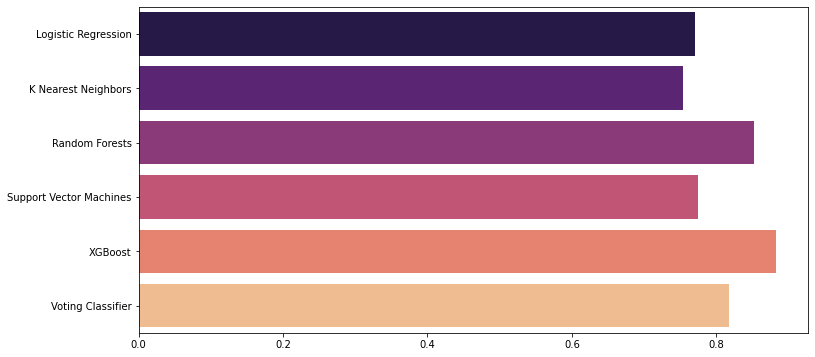

In [65]:
plt.figure(figsize = (12, 6))
sns.barplot(x = score, y = model, palette = 'magma')
plt.show()

<h1 style="font-family: 'Poppins', sans-serif; font-size: 24px; text-align: center; color: #fff; background-color: #1D84B5; padding: 15px; border-radius: 40px">XG Boost performed the best with accuracy of 88.3%</h1>
<h1 style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: center; color: #000";>Random Forests is just behind with accuracy of 86.14%</h1>

<h1 style="font-family: 'Poppins', sans-serif; font-size: 32px; text-align: center; color: #fff; background-color: #000; padding: 15px; border-radius: 5px">Please give your valuable feedbacks and if you like the notebook do UPVOTE!!</h1>